# Bayesian ML: Fundamentals

Author: [Zeel B Patel](https://patel-zeel.github.io/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
from jax import numpy as jnp, grad
import scipy

## What is the intuition behind the Bayesian update?
https://www.youtube.com/watch?v=HZGCoVF3YvM

Guess who is Steve? A farmer or a librarian?

![Steeve](https://raw.githubusercontent.com/patel-zeel/Adhoc/master/images/Screenshot%20(6).png)

![Steve](https://raw.githubusercontent.com/patel-zeel/Adhoc/master/images/Screenshot%20(7).png)

![Steve](https://raw.githubusercontent.com/patel-zeel/Adhoc/master/images/Screenshot%20(9).png)

Paradox in the above example suggests noting the essense of Bayes rule as the following,

* New information does not completely determine the new belief but it just updates the prior belief

## Bayes theorem

$$ 
p(B|A) = \frac{p(A|B)}{p(A)}p(B) \to p(\theta|D) = \frac{p(D|\theta)}{p(D)}p(\theta)
$$

* $p(D|\theta)$ - likelihood
* $p(\theta)$ - prior
* $p(D)$ - evidence
* $p(\theta|D)$ - posterior

Let us understand Likelihood, prior and evidence individually then we will move to the posterior

## Likelihood and Maximum Likelihood estimation (MLE) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation

rc('font',size=16)
rc('text',usetex=True)

What is the likelihood? How likely the event is, given a belief. It is defined as below in the ML context.

$$
p(D|\theta)
$$

## A simple coin flip experiment.

We want to determine the probability (likelihood) of $D=\{H,T,H,H,H,H,T,H,H,H\}$ after 10 coin flips believing that we have a fair coin ($p(H)=\theta=0.5$).

$$
p(D|\theta) = \prod\limits_{i=1}^{10}p(D_i|\theta) = (0.5)^8(0.5)^2 = 2^{-10}
$$

More generally, out of N experiments, if we see $h$ heads, likelihood $p(D|\theta)$ is,

$$
p(D|\theta) = (\theta)^h(1-\theta)^{N-h}
$$

This likelihood is known as the **Bernoulli likelihood**.

In the aboce example, $D$ event is less likely given a fair coin. Intuitively, looking at $D$, the coin seems biased towards $H$? What's your guess for $\theta$?

Let's visualize likelihood of $D$ for various values of $\theta$.

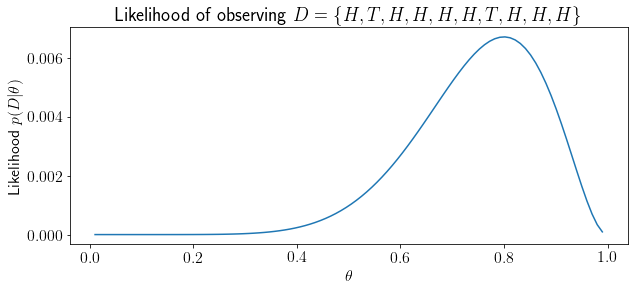

In [3]:
def Bernoulli(theta,N,h):
    return (theta**h)*((1-theta)**(N-h))
def BernoulliModified(theta,N,h): # exp after log
    return np.exp(h*np.log(theta) + (N-h)*np.log(1-theta))
def LogBernoulli(theta,N,h): # exp after log
    return h*np.log(theta) + (N-h)*np.log(1-theta)

N,h = 10,8
theta = np.linspace(0.01,0.99,100)
BL = [Bernoulli(t,N,h) for t in theta]
BLM = BernoulliModified(theta,N,h)
LogBL = LogBernoulli(theta,N,h)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(theta, BL);
plt.xlabel('$\\theta$');plt.ylabel('Likelihood $p(D|\\theta)$');
plt.title('Likelihood of observing $D=\{H,T,H,H,H,H,T,H,H,H\}$');

Visually, we can see that, our event is most likely at $\theta=0.8$. How can we say that concretely (with mathematical/analytical support)?

We need to look at the maximum likelihood for this problem.

## Maximum likelihood estimation (MLE)

We know that following claims are true for any differentiable function,

* $\theta$ would be optimal at $\frac{d}{d\theta}L(D|\theta)=0$
* $\theta$ would be maximum at $\frac{d^2}{d\theta^2}L(D|\theta)<0$.

Let us find out optimal $\theta$ using the above propoerties.

\begin{align}
p(D|\theta) &= (\theta)^h(1-\theta)^{N-h}\\
\frac{d}{d\theta}p(D|\theta) &= h\theta^{h-1}(1-\theta)^{N-h} - (N-h)\theta^h(1-\theta)^{N-h-1} = 0\\
\\
\text{follows that,}\\
h(1-\theta)-(N-h)\theta &= 0\\
h - h\theta - N\theta + h\theta &= 0\\
\theta_{MLE} &= \frac{h}{N}
\end{align}

Verifying our example, we had $h=8$ and $N=10$, so $\theta_{MLE}=8/10=0.8$. 

We see from the earlier plot that this is a maxima, but one can also verify it by double differentiation. 

## Likelihood v/s modified likelihood v/s log likelihood

Bernoulli likelihood is given as following,

$$
p(D|\theta) = (\theta)^h(1-\theta)^{N-h}
$$

We can avoid potential numerical errors transforming it as following,

$$
p(D|\theta) = \exp\left[h\log(\theta)+(N-h)\log(1-\theta)\right]
$$

Or, we can use the log-likelihood directly.

$$
\log p(D|\theta) = h\log(\theta)+(N-h)\log(1-\theta)
$$

Let us visualize these three variants for our coin toss example.

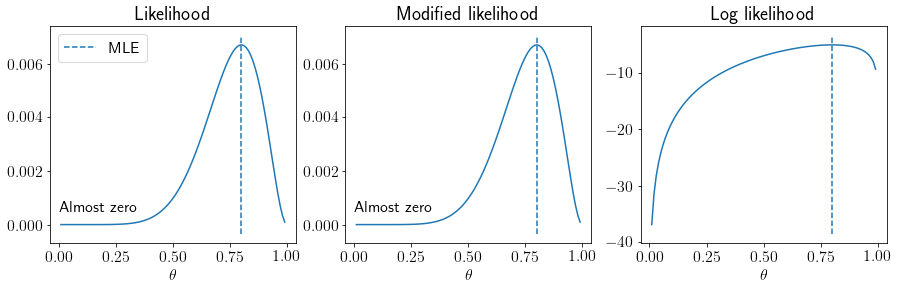

In [4]:
def Bernoulli(theta,N,h):
    return (theta**h)*((1-theta)**(N-h))
def BernoulliModified(theta,N,h): # exp after log
    return np.exp(h*np.log(theta) + (N-h)*np.log(1-theta))
def LogBernoulli(theta,N,h): # exp after log
    return h*np.log(theta) + (N-h)*np.log(1-theta)

N,h = 10,8
theta = np.linspace(0.01,0.99,100)
BL = [Bernoulli(t,N,h) for t in theta]
BLM = BernoulliModified(theta,N,h)
LogBL = LogBernoulli(theta,N,h)

fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(theta, BL);
ax[1].plot(theta, BLM);
ax[2].plot(theta, LogBL);
for axs in ax:
    axs.set_xlabel('$\\theta$')
    axs.vlines(0.8,*axs.get_ylim(),linestyle='--', label='MLE')
ax[0].text(0,0.0005,'Almost zero')
ax[1].text(0,0.0005,'Almost zero')
ax[0].legend()
ax[0].set_title('Likelihood');
ax[1].set_title('Modified likelihood');
ax[2].set_title('Log likelihood');

What are the benefits of using log likelihood over likelihood?

* Avoids numerical underflow/overflow
* Handles close to zero values efficiently.

## MLE with log likelihood

Stating the optimization rules for log likelihood

* $\theta$ would be optimal at $\frac{d}{d\theta}\log L(D|\theta)=0$
* $\theta$ would be maximum at $\frac{d^2}{d\theta^2}\log L(D|\theta)<0$.

\begin{align}
p(D|\theta) &= (\theta)^h(1-\theta)^{N-h}\\
\log p(D|\theta) &= h\log(\theta)+(N-h)\log(1-\theta)\\
\frac{d}{d\theta}\log p(D|\theta) &= \frac{h}{\theta} - \frac{N-h}{1-\theta} = 0\\
\\
\text{follows that,}\\
h(1-\theta)-(N-h)\theta &= 0\\
h - h\theta - N\theta + h\theta &= 0\\
\theta_{MLE} &= \frac{h}{N}
\end{align}

Notice that double differentiation is trivial in this setting,

\begin{align}
\frac{d}{d\theta}\log p(D|\theta) &= \frac{h}{\theta} - \frac{N-h}{1-\theta}\\
\frac{d^2}{d\theta^2}\log p(D|\theta) &= -\frac{h}{\theta^2}-\frac{N-h}{(1-\theta)^2} < 0
\end{align}

Double differentiation is negative and thus our optima is the maxima.

Now onwards, we will directly use log likelihood.

## Gaussian distribution

A continuous random variable is called Gaussian distributed if it follows the below pdf,

$$
p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left[{-\frac{(x-\mu)^2}{2\sigma^2}}\right]
$$

Let's visualize some samples drawn from Gaussian distribution.

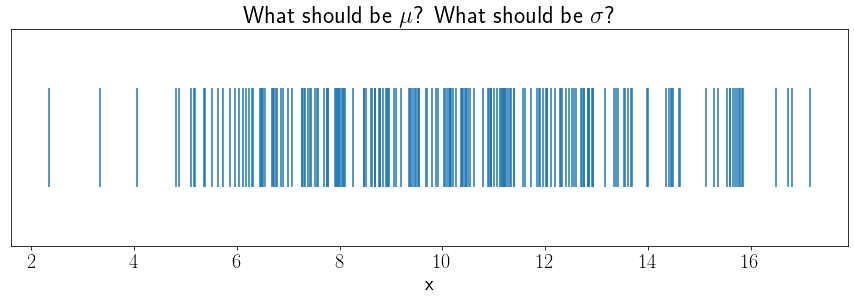

In [5]:
rc('font',size=20)
rc('text',usetex=True)
np.random.seed(0)
x = np.load('../data/bml_norm_x.npy')
plt.figure(figsize=(15,4))
plt.eventplot(x);
plt.yticks([]);plt.xlabel('x');
plt.title('What should be $\mu$? What should be $\sigma$?');

Hold this question for now, first, let us visualize the pdf of Gaussian distribution by varying $\mu$ and $\sigma$.

In [6]:
def GaussianPDF(mu, sigma, x):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-np.square(x-mu)/2/sigma**2)

rc('font',size=16)
rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,4))
mu, sigma = 0, 10
def update(mu):
    np.random.seed(mu)
    ax.cla()
    x = np.sort(np.random.normal(mu, sigma, 100))
    pdfx = np.linspace(x.min(), x.max(), 100)
    G_pdf = GaussianPDF(mu, sigma, pdfx)
    ax.plot(pdfx, G_pdf,label='pdf')
    ax.plot(x, np.ones(x.shape[0])*-0.001, '|k', markersize=20, label='samples')
    ax.vlines([mu+sigma, mu-sigma], *ax.get_ylim(), label='$\sigma$', linestyle='--')
    ax.vlines([mu+2*sigma, mu-2*sigma], *ax.get_ylim(), label='$2\sigma$', linestyle='--',color='r')
    ax.legend()
    ax.set_xlabel('x');ax.set_ylabel('pdf');
    ax.set_title(f'$\mu$ = {mu}, $\sigma$={sigma}');
    ax.set_xlim(-35,90)
    plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, frames=np.arange(1,60,5))
rc('animation',html='jshtml')
anim

<Figure size 432x288 with 0 Axes>

In [7]:
def GaussianPDF(mu, sigma, x):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-np.square(x-mu)/2/sigma**2)

rc('font',size=16)
rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,4));
mu, sigma = 0, 10
def update(sigma):
    np.random.seed(0)
    ax.cla()
    x = np.sort(np.random.normal(mu, sigma, 100))
    pdfx = np.linspace(x.min(), x.max(), 100)
    G_pdf = GaussianPDF(mu, sigma, pdfx)
    ax.plot(pdfx, G_pdf,label='pdf')
    ax.plot(x, np.ones(x.shape[0])*-0.001, '|k', markersize=20, label='samples')
    ax.vlines([mu+sigma, mu-sigma], *ax.get_ylim(), label='$\sigma$', linestyle='--')
    ax.vlines([mu+2*sigma, mu-2*sigma], *ax.get_ylim(), label='$2\sigma$', linestyle='--',color='r')
    ax.legend()
    ax.set_xlabel('x');ax.set_ylabel('pdf');
    ax.set_title(f'$\mu$ = {mu}, $\sigma$={sigma}');
    ax.set_xlim(-35,35)
    ax.set_ylim(-0.02,0.12)
    plt.tight_layout();

plt.close();
anim = FuncAnimation(fig, update, frames=np.arange(4,11))
anim

<Figure size 432x288 with 0 Axes>

### MLE estimate for the Gaussian distribution parameters

We draw N samples independently from a Gaussian distribution. $D=\{x_1, x_2, ..., x_N\}$

Let us estimate $\mu_{MLE}$ first,

\begin{align}
p(D|\mu) &= \prod\limits_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma^2}}exp\left[{-\frac{(x_i-\mu)^2}{2\sigma^2}}\right]\\
\log p(D|\mu) &= -\frac{N}{2}\log(2\pi\sigma^2)-\frac{1}{2}\sum\limits_{i=1}^{N}\frac{(x_i-\mu)^2}{\sigma^2}\\
\frac{d}{d\mu}\log p(D|\mu) &= \sum\limits_{i=1}^{N}\frac{(x_i-\mu)}{\sigma^2} = 0\\
\\
\text{Follows that,}\\
\mu_{MLE} &= \frac{1}{N}\sum\limits_{i=1}^{N}x_i
\end{align}

Now, we will estimate $\sigma_{MLE}$,

\begin{align}
p(D|\sigma) &= \prod\limits_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma^2}}exp\left[{-\frac{(x_i-\mu)^2}{2\sigma^2}}\right]\\
\log p(D|\sigma) &= -\frac{N}{2}\log(2\pi\sigma^2)-\frac{1}{2}\sum\limits_{i=1}^{N}\frac{(x_i-\mu)^2}{\sigma^2}\\
\frac{d}{d\sigma}\log p(D|\sigma) &= -\frac{N}{2}\frac{4\pi\sigma}{2\pi\sigma^2} + \sum\limits_{i=1}^{N}\frac{(x_i-\mu)^2}{\sigma^3} = 0\\
\\
\text{Follows that,}\\
\frac{N}{\sigma} &= \sum\limits_{i=1}^{N}\frac{(x_i-\mu)^2}{\sigma^3}\\
\sigma^2_{MLE} &= \frac{1}{N}\sum\limits_{i=1}^{N}(x_i-\mu)^2
\end{align}

Let us estimate MLE of $\mu, \sigma$ for the samples shown earlier.

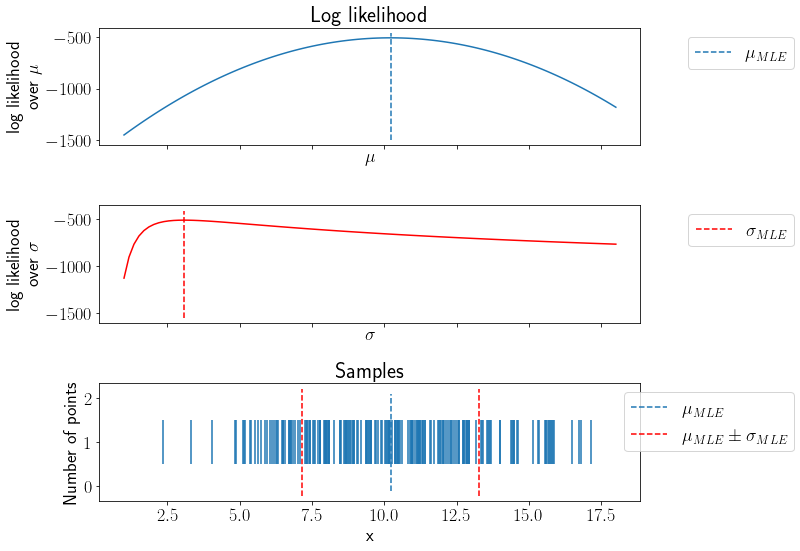

In [8]:
def LogGaussian(mu, sigma, x):
    return -0.5*np.log(2*np.pi*sigma**2)*x.shape[0] - 0.5*np.sum(np.square((x.squeeze()-mu)/sigma))

mu,sigma=10,3
np.random.seed(0)
x = np.load('../data/bml_norm_x.npy')
muR = np.linspace(1,18,100)
Lmu = [LogGaussian(mu, sigma, x) for mu in muR]
Lsigma = [LogGaussian(mu, sigma, x) for sigma in muR]

rc('font',size=18)
rc('text',usetex=True)
fig, ax = plt.subplots(3,1,figsize=(12,8), sharex=True)
ax[0].plot(muR, Lmu);ax[0].set_ylabel('log likelihood\nover $\mu$');
ax[1].plot(muR, Lsigma, color='r')
ax[1].set_ylabel('log likelihood\nover $\sigma$');
ax[0].set_title('Log likelihood');ax[0].set_xlabel('$\mu$');ax[1].set_xlabel('$\sigma$');
ax[0].vlines(np.mean(x), *ax[0].get_ylim(), linestyle='--',label='$\mu_{MLE}$')
ax[1].vlines(np.std(x), *ax[0].get_ylim(), linestyle='--',label='$\sigma_{MLE}$',color='r')
ax[2].eventplot(x);ax[2].set_xlabel('x');ax[2].set_ylabel('Number of points');
ax[2].vlines(np.mean(x), *ax[2].get_ylim(), linestyle='--',label='$\mu_{MLE}$')
ax[2].vlines([np.mean(x)-np.std(x),np.mean(x)+np.std(x)], *ax[2].get_ylim(), linestyle='--',label='$\mu_{MLE}\pm\sigma_{MLE}$',color='r')
ax[2].set_title('Samples');
for axs in ax:
    axs.legend(bbox_to_anchor=(1.3,1));
plt.tight_layout();

Notice the mean and standard deviation values in above plot. Let us verify this result analytically,

In [9]:
np.mean(x), np.std(x)

(10.212731479423482, 3.0642683060879863)

## Poisson distribution

A discrete random variable is called Poisson distributed if it has the following pmf,

$$
p(x|\lambda) = \frac{\lambda^xe^{-\lambda}}{x!}
$$

Wonder how this formula is derived? checkout https://www.youtube.com/watch?v=7cg-rxofqj8

A potential application can be modeling text-messages given in [this book](https://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/).

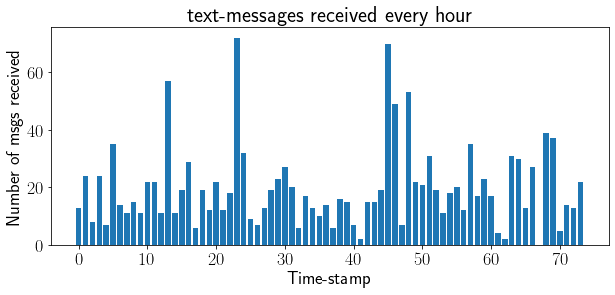

In [10]:
msg = np.loadtxt('https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter1_Introduction/data/txtdata.csv')
plt.figure(figsize=(10,4))
plt.bar(range(len(msg)),msg);
plt.title('text-messages received every hour');
plt.xlabel('Time-stamp');plt.ylabel('Number of msgs received');

### Other applications
1. Telephone calls arriving in a system
1. Customers arriving at a counter
1. The number of photons emitted in a single laser pulse

And many more on [Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution)

The following animation shows how pmf varies with varying $\lambda$. 

In [11]:
def Poisson(lmd, k):
    return lmd**k*np.exp(-lmd)/np.math.factorial(int(k))

k = np.arange(21)
rc('font',size=14)
fig, axs = plt.subplots(1,2,figsize=(12,5))
ax, ax1 = axs
def update(lmd):
    np.random.seed(0)
    ax.cla();ax1.cla()
    P_pdf = [Poisson(lmd, ki) for ki in k]
    ax.plot(k, P_pdf,'o-',label='pmf')
    ax.set_xlabel('x');ax.set_ylabel('pmf');
    ax.set_title(f'lambda = {lmd}')
    ax.set_ylim(0,0.4);
    ax.legend();
    
    ax1.bar(range(20), np.random.poisson(lam=lmd, size=20))
    ax1.set_title('Samples')
    ax1.set_ylim(0,20);
plt.close()
anim = FuncAnimation(fig, update, frames=np.arange(1,11))
rc('animation',html='jshtml')
anim

### MLE estimate for the Poisson distribution parameters

We draw N samples independently from a Poisson distribution. $D=\{x_1, x_2, ..., x_N\}$,

\begin{align}
p(D|\lambda) &= \prod\limits_{i=1}^{N}\frac{\lambda^{x_i}e^{-\lambda}}{x_i!}\\
\log p(D|\lambda) &= \sum\limits_{i=1}^{N}\log(\lambda^{x_i})+\sum\limits_{i=1}^{N}\log(e^{-
\lambda})-\sum\limits_{i=1}^{N}\log(x_i!)\\
\frac{d}{d\lambda}\log p(D|\lambda) &= \frac{\sum\limits_{i=1}^{N}x_i}{\lambda} - \sum\limits_{i=1}^{N}1 = 0\\
\lambda_{MLE} &= \frac{1}{N}\sum\limits_{i=1}^{N}x_i
\end{align}

Let us estimate MLE of $\lambda$ for the text-messages data.

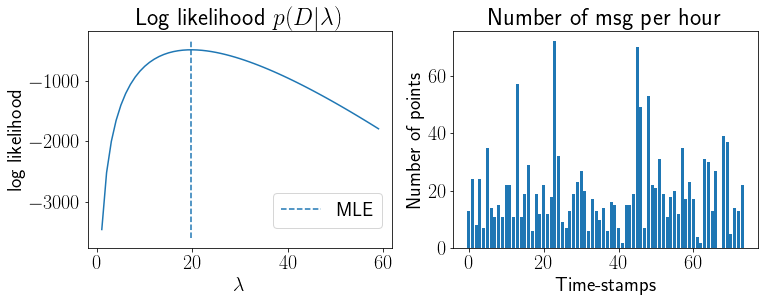

In [12]:
np.random.seed(123)
x = msg
L = [np.sum([np.log(Poisson(lmdi, xi)) for xi in x]) for lmdi in range(1,60)]
rc('font',size=20)
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(range(1,60), L);ax[0].set_xlabel('$\lambda$');ax[0].set_ylabel('log likelihood');
ax[0].set_title('Log likelihood $p(D|\lambda)$');
ax[0].vlines(np.mean(x), *ax[0].get_ylim(), linestyle='--',label='MLE')
ax[1].bar(range(len(msg)), msg);ax[1].set_xlabel('Time-stamps');ax[1].set_ylabel('Number of points');
ax[1].set_title('Number of msg per hour');
ax[0].legend(bbox_to_anchor=(1,0.3));

In [13]:
np.mean(x)

19.743243243243242

## You should trust MLE with a caution..!!
![MAP](https://raw.githubusercontent.com/patel-zeel/Adhoc/master/images/MAP.jpg)

**Bayes Rule: New evidence does not completely determine the new belief but it updates the prior belief.**

According to MLE,

* $D=\{H,H,H,H\} \to \theta_{MLE}=1$ 
    
* $D=\{H,T,T,H\} \to \theta_{MLE}=0.5$

* $D=\{T,T,T,T\} \to \theta_{MLE}=0$

Thus, we need to consider a prior belief in our parameter estimation

## Prior beliefs over parameters 

Before moving to prior over parameters, we will see what is a Beta distribution (we will use it later in the flow).

### Beta distribution

pdf of Beta distribution is defined as,

$$
p(\theta|\alpha, \beta) = \frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha,\beta)}, \alpha,\beta>0\\
B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\\
\Gamma(\alpha) = (\alpha-1)!
$$

The following animation shows effect of varying $\alpha, \beta$ on the pdf.

In [14]:
theta = np.linspace(0,1,50)
alp = np.linspace(1,5,10).tolist() + np.linspace(5,5,10).tolist() + np.linspace(5,1,10).tolist() + np.linspace(1,10,10).tolist() + np.linspace(10,1,10).tolist() + np.linspace(1,0.1,10).tolist()
bet = np.linspace(5,5,10).tolist() + np.linspace(5,1,10).tolist() + np.linspace(1,1,10).tolist() + np.linspace(1,10,10).tolist() + np.linspace(10,1,10).tolist() + np.linspace(1,0.1,10).tolist()

fig, ax = plt.subplots(figsize=(6,5));
def update(i):
    ax.cla();
    ax.plot(theta, scipy.stats.beta.pdf(theta, alp[i], bet[i]));
    ax.set_title(f'$\\alpha$={np.round(alp[i],2)}, $\\beta$ = {np.round(bet[i],2)}');
    ax.set_ylim(0,6);
    ax.set_xlabel('$\\theta$');ax.set_ylabel('pdf');
    plt.tight_layout();

plt.close();
anim = FuncAnimation(fig, update, range(len(alp)));
anim

<Figure size 432x288 with 0 Axes>

### Parameters may have an underlying distribution

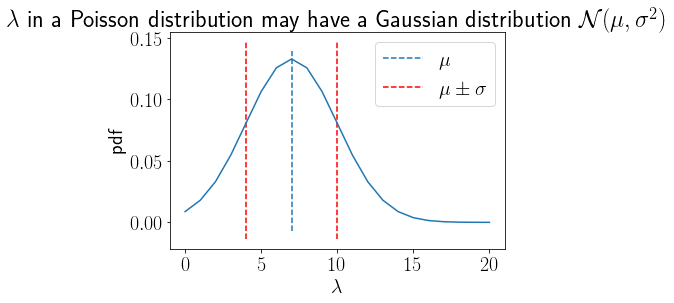

In [15]:
x = np.linspace(0,20,21)
Gaussprior = GaussianPDF(7, 3, x)
rc('font',size=20)
plt.plot(x, Gaussprior);
plt.vlines(7,*plt.gca().get_ylim(), linestyle='--', label='$\mu$')
plt.vlines([7-3,7+3],*plt.gca().get_ylim(), linestyle='--', label='$\mu\pm\sigma$',color='r')
plt.title('$\lambda$ in a Poisson distribution may have a Gaussian distribution $\mathcal{N}(\mu,\sigma^2)$');
plt.xlabel('$\lambda$');plt.ylabel('pdf');
plt.legend();

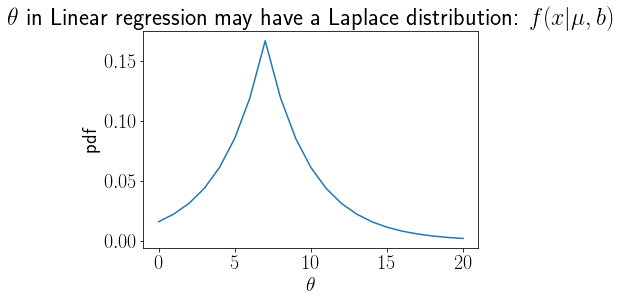

In [16]:
def LaplacePDF(mu, b, x):
    return (1/2/b)*np.exp(-np.abs(x - mu)/b)

x = np.linspace(0,20,21)
Laplaceprior = LaplacePDF(7, 3, x)
rc('font',size=20)
plt.plot(x, Laplaceprior);
plt.title('$\\theta$ in Linear regression may have a Laplace distribution: $f(x|\mu,b)$');
plt.xlabel('$\\theta$');plt.ylabel('pdf');

### How to choose appropriate prior distribution for given likelihood ? $\to$ Conjugate priors

We choose a conjugate prior to likelihood to ensure the same distribution in posterior as prior

* Example 1: Bernoulli likelihood $\to$ Beta prior $\to$ Beta posterior 
* Example 2: Gaussian likelihood $\to$ Gaussian prior $\to$ Gaussian posterior 

More info on conjugate priors is at https://en.wikipedia.org/wiki/Conjugate_prior

### Maximum A Posteriori (MAP) estimation

Utilizing prior distribution, we can get more realistic (in Bayesian sense) estimate of parameters compared to MLE. We will call this MAP. 

\begin{align}
p(\theta_{posterior}|D) &= \frac{p(D|\theta_{prior})}{p(D)}p(\theta_{prior})\\
p(D) \text{ can be treated as a constant}\\
p(\theta_{posterior}|D) &\propto p(D|\theta_{prior})p(\theta_{prior}) 
\\\\
\text{MLE: }&\arg\max_\theta \; p(D|\theta)\\
\text{MAP: }&\arg\max_\theta \; p(\theta|D) = \arg\max_\theta \; p(D|\theta)p(\theta)
\end{align}

## MAP for a simple coin flip experiment

We assume $p(\theta) \sim Beta(\alpha, \beta)$ (Because Beta prior is conjugate to Bernoulli likelihood)

\begin{align}
p(\theta|D)p(\theta) &= \theta^h(1-\theta)^{N-h}\cdot\frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha, \beta)}\\
                     &= \frac{\theta^{h+\alpha-1}(1-\theta)^{N-h+\beta-1}}{B(\alpha, \beta)}\\
\log p(\theta|D)p(\theta) &= (h+\alpha-1)\log(\theta) + (N-h+\beta-1)\log(1-\theta) - \log(B(\alpha, \beta))\\
\\
\frac{d}{d\theta} \log p(\theta|D)p(\theta) &= \frac{h+\alpha-1}{\theta} - \frac{N-h+\beta-1}{1-\theta} = 0\\
\\
\theta_{MAP} &= \frac{h+(\alpha-1)}{N+(\alpha-1)+(\beta-1)}
\end{align}

Let us visualize MLE and MAP for various prior (effectively varying $\alpha,\beta$ of Beta prior)

In [17]:
N,h = 10,8
theta = np.linspace(0.01,0.99,100)
BL = [Bernoulli(t,N,h) for t in theta]
BLM = BernoulliModified(theta,N,h)
LogBL = LogBernoulli(theta,N,h)
rc('font',size=20)
rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,4))
axs = ax.twinx()
def update(i):
    ax.cla();axs.cla();
    axs.set_ylim(-0.02,5)
    al,be = alp[i], bet[i]
    ax.plot(theta, BL, label='Likelihood');
    axs.plot(theta, scipy.stats.beta.pdf(theta, al,be), label='Prior',color='k');
    ax.set_xlabel('$\\theta$');
    ax.vlines(0.8, *ax.get_ylim(), linestyle='--',label='MLE')
    ax.text(0.8,0,'MLE')
    ax.text(theta[0], BL[0],'Likelihood')
    axs.text(theta[0], scipy.stats.beta.pdf(theta, al,be)[0],'Prior')
    axs.text(0.4,2,'Prior mean')
    axs.text((h+al-1)/(N+al+be-2),1,'MAP')
    ax.vlines(0.5, *ax.get_ylim(), linestyle='--',label='Prior mean',color='k')
    ax.vlines((h+al-1)/(N+al+be-2), *ax.get_ylim(), linestyle='--',label='MAP',color='r')
    ax.set_title('D=\{H,T,H,H,H,H,T,H,H,H\}, $\\alpha = '+str(np.round(al,2))+'$, $\\beta='+str(np.round(be,2))+'$');
    # ax.set_yscale('log');
#     ax.legend(bbox_to_anchor=(1,1));axs.legend(bbox_to_anchor=(1.25,0.6));
plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, range(len(alp)))
anim

## Evidence $p(D)$

Note that we discussed about likelihood and prior. If we get the evidence (denominator in Bayes formula) as well, we can compute the *exact* posterior distribution. 

$$
p(D) = \int\limits_{\theta}p(D|\theta)p(\theta)d\theta
$$

$$
p(D) = \sum\limits_{\theta\in \Theta}p(D|\theta)\theta
$$

In practive, evidence is hard to calculate because of non-trivial intigration over $\theta$. But, in simple models, it is possible to derive.

## Full posterior calculation for coin toss experiment

\begin{align}
p(D) &= \int\limits_{0}^{1}p(D|\theta)p(\theta)d\theta\\
     &= \int\limits_{0}^{1}(\theta)^h(1-\theta)^{N-h}\frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha,\beta)}d\theta\\
     &= \frac{1}{B(\alpha,\beta)}\int\limits_{0}^{1}(\theta)^{h+\alpha-1}(1-\theta)^{N-h+\beta-1}\\
     &= \frac{1}{B(\alpha,\beta)}\frac{(h+\alpha-1)!(N-h+\beta-1)!}{(N+\alpha+\beta-1)!}
\end{align}

\begin{align}
p(\theta|D) = \frac{p(D|\theta)}{p(D)}p(\theta)&=B(\alpha,\beta)\frac{(N+\alpha+\beta-1)!}{(h+\alpha-1)!(N-h+\beta-1)!}\frac{\theta^{h+\alpha-1}(1-\theta)^{N-h+\beta-1}}{B(\alpha, \beta)}\\
\\
&= Beta(h+\alpha, N-h+\beta)
\end{align}

We have successfully shown that the posterior follows Beta distribution. Let us visualize the exact posterior distribution.

In [19]:
from scipy.special import gamma

N,h = 10,8
theta = np.linspace(0.01,0.99,100)
BL = [Bernoulli(t,N,h) for t in theta]
BLM = BernoulliModified(theta,N,h)
LogBL = LogBernoulli(theta,N,h)
rc('font',size=20)
rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,4))
axs = ax.twinx()
def update(i):
    ax.cla();axs.cla()
    axs.set_ylim(-0.02,5)
    al,be = alp[i], bet[i]
    ax.plot(theta, BL, label='Likelihood');
    axs.plot(theta, scipy.stats.beta.pdf(theta, al,be), label='Prior',color='k');
    ax.set_xlabel('$\\theta$');
    ax.vlines(0.8, *ax.get_ylim(), linestyle='--',label='MLE')
    axs.text(0.8,2,'MLE')
    
    axs.plot(theta, [scipy.stats.beta.pdf(t, h+al, N-h+be) for t in theta], color='r')
    ax.text(theta[0], BL[0],'Likelihood')
    axs.text(theta[0], scipy.stats.beta.pdf(theta, al,be)[0],'Prior')
    axs.text(0.4,2,'Prior mean')
    axs.text(theta[0],scipy.stats.beta.pdf(theta[0], h+al, N-h+be),'Posterior')
    axs.text((h+al-1)/(N+al+be-2),1,'MAP')
    ax.vlines(al/(al+be), *ax.get_ylim(), linestyle='--',label='Prior mean',color='k')
    ax.vlines((h+al-1)/(N+al+be-2), *ax.get_ylim(), linestyle='--',label='MAP',color='r')
    ax.set_title('D=\{H,T,H,H,H,H,T,H,H,H\}, $\\alpha = '+str(np.round(al,2))+'$, $\\beta='+str(np.round(be,2))+'$');
    # ax.set_yscale('log');
#     ax.legend(bbox_to_anchor=(1,1));axs.legend(bbox_to_anchor=(1.25,0.6));
plt.tight_layout()
plt.close()
anim = FuncAnimation(fig, update, range(len(alp)))
anim

Another use of evidence $p(D)$ is model comparison. For multiple models, higher value of $p(D)$ suggests a better model.

$$
BayesFactor = \frac{p(D|M1)}{p(D|M2)}
$$

We will look into this aspect in other notebooks.